# 5. Neural Networks

In [2]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score


from prml import nn

np.random.seed(1234)
import pixiedust

Pixiedust database opened successfully


# 5.1 Feed-forward Network Functions

In [3]:
class RegressionNetwork(nn.Network):
    
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        with self.set_parameter():
            #创建nn 权值参数自定义数组nn.array,存放在nn.Network paramter中，
            #前向后向算法会通过优化器更新这些参数，参看adam优化算法
            self.w1 = nn.random.truncnormal(-2, 2, 1, (n_input, n_hidden))
            self.b1 = nn.zeros(n_hidden)
            self.w2 = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_output))
            self.b2 = nn.zeros(n_output)

    def __call__(self, x):
        h = nn.tanh(x @ self.w1 + self.b1)
        return h @ self.w2 + self.b2

n_func= 4  i= 0 pos_subplot_func= 1
w1: [[1.5231818 1.5062605]]
b1: [ 1.4810503 -1.483473 ]
w2: [[-1.1581339]
 [ 1.1814712]]
b2: [2.11437]
pos_subplot_loss= 2
n_func= 4  i= 1 pos_subplot_func= 3
w1: [[-1.6707761   0.58608526]]
b1: [-3.411318e-05 -9.387953e-05]
w2: [[-5.268157]
 [-9.191565]]
b2: [-0.00025248]
pos_subplot_loss= 4
n_func= 4  i= 2 pos_subplot_func= 5
w1: [[1.5472895 1.5479778]]
b1: [-0.42803767  0.42847618]
w2: [[ 1.3317566]
 [-1.3317152]]
b2: [1.1654958]
pos_subplot_loss= 6
n_func= 4  i= 3 pos_subplot_func= 7
w1: [[-43.431576 -25.421474]]
b1: [-1.4648249e-06  1.1556722e-06]
w2: [[-1.0813364]
 [ 0.5703876]]
b2: [0.50000256]
pos_subplot_loss= 8


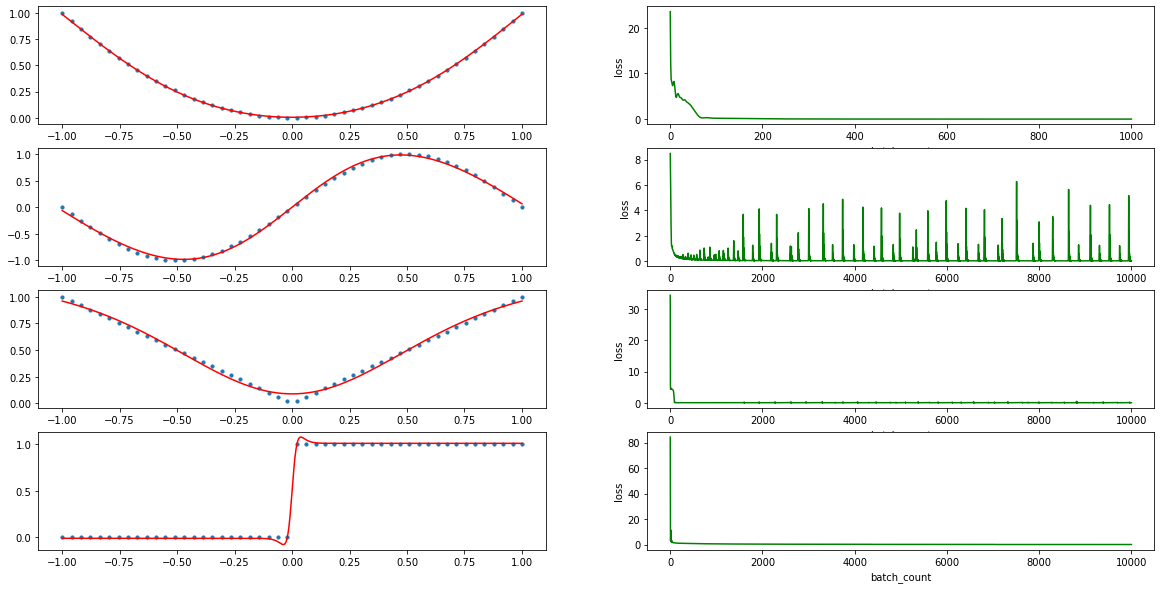

In [8]:
# %%pixie_debugger


def create_toy_data(func, n=50):
    x = np.linspace(-1, 1, n)[:, None]
    return x, func(x)


def sinusoidal(x):
    return np.sin(np.pi * x)


def heaviside(x):
    return 0.5 * (np.sign(x) + 1)


def hook_debug(*args, **key_args):
    print("-----hook_debug-------")
    print("--args:", args)
    print("---key_args:", key_args)
    raw_fuc_forward(args, key_args)
    
#hook class Function---------
# fuc_forward=nn.function.Function.forward
# if fuc_forward is not hook_debug:
#     print("hook function----")
#     raw_fuc_forward=nn.function.Function.forward
#     nn.function.Function.forward=hook_debug
#----------

func_list = [np.square, sinusoidal, np.abs, heaviside]
n_func = len(func_list)
plt.figure(figsize=(20, 10))
x = np.linspace(-1, 1, 1000)[:, None]
for i, func, n_iter in zip(range(0, n_func), func_list, [1000, 10000, 10000, 10000]):
    pos_subplot_func = i * 2 + 1
    print("n_func=", n_func, " i=", i, "pos_subplot_func=", pos_subplot_func)
    plt.subplot(n_func, 2, pos_subplot_func)
    x_train, y_train = create_toy_data(func)
    model = RegressionNetwork(1, 2, 1)
    optimizer = nn.optimizer.Adam(model.parameter, 0.1)
#     optimizer = nn.optimizer.RMSProp(model.parameter, learning_rate = 0.1)
#     optimizer = nn.optimizer.AdaGrad(model.parameter, learning_rate = 0.1)
    loss_trend_array = []
    for _ in range(n_iter):
        model.clear()
        y_f = model(x_train)
        square = nn.square(y_train - y_f)
        loss = square.sum()
        loss_trend_array.append(loss.value)
        optimizer.minimize(loss)
    y = model(x).value
    
    #print w,b
    print("w1:", model.w1.value)
    print("b1:", model.b1.value)
    print("w2:", model.w2.value)
    print("b2:", model.b2.value)
    
    # show function
    plt.scatter(x_train, y_train, s=10)
    plt.plot(x, y, color="r")

    # show loss trend
    pos_subplot_loss = pos_subplot_func + 1
    print("pos_subplot_loss=", pos_subplot_loss)
    plt.subplot(n_func, 2, pos_subplot_loss)
    plt.xlabel("batch_count")
    plt.ylabel("loss")
    plt.plot(np.linspace(0, n_iter, len(loss_trend_array)),
             loss_trend_array, color="g")

plt.show()

###  + use epoch

### + reset variable

In [ ]:
# %reset -f
# exec In[n:m]

len(x_test)= 10   len(y_test)= 10
x_test: [-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
y_test: [-55.206955 -55.20696  -55.20696  -55.20696  -55.20696  -55.20696
 -55.20696  -55.20696  -55.20696  -55.20696 ]
w1: [[-197.69221 -195.68059]]
b1: [ 209.64539 -203.9902 ]
w2: [[-16.939064]
 [ 17.642963]]
b2: [-20.624931]


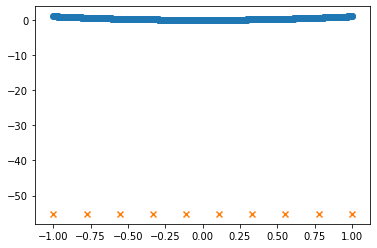

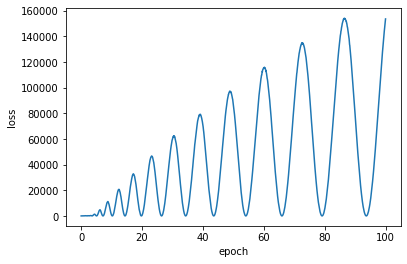

In [19]:
# %%pixie_debugger


def create_data_xy_list(n_example):
    x = np.random.normal(size=n_example)[:, None]
    y = np.square(x)
    return list(zip(x, y))


def create_test_x(n_example):
#     x = np.random.normal(size=(n_example, 1))
    x = np.linspace(-1, 1, n_example)[:, None]
    return x


def create_data_xy_tuple(n_example):
#     x = np.random.normal(size=(n_example, 1))
    x = np.linspace(-1, 1, n_example)[:, None]
    y = np.square(x)
    return x, y


def create_batch_generator(features, labels, batch_size):
    num_examples = len(features)
    indics = list(range(num_examples))
    np.random.shuffle(indics)
    for i in range(0, num_examples, batch_size):
        # i,j = 0~batch_size, batch_size + 1~batch_size * 2...
        j = np.array(indics[i:min(i + batch_size, num_examples)])
        yield features.take(j)[:, None], labels.take(j)[:, None]


n_epoch = 100
n_batch = 50
X_train, Y_train = create_data_xy_tuple(1000)

model = RegressionNetwork(1, 2, 1)
optimizer = nn.optimizer.Adam(model.parameter, 0.1)
# xy_train = create_list_xy(n_batch * 100)


loss_history = []
for _ in range(n_epoch):
    batch_iter = create_batch_generator(X_train, Y_train, n_batch)
    for X_batch, Y_batch in batch_iter:
        #         loss = np.square(Y_batch - model(X_batch)).sum()
        loss = nn.square(Y_batch - model(X_batch)).sum()
#         np.square([1,2,3]).sum()
        loss_history.append(loss.value)
        optimizer.minimize(loss)

X_test = create_test_x(10)
Y_test = model(X_test).value
print("len(x_test)=", len(X_test), "  len(y_test)=", len(Y_test))
print("x_test:", X_test.ravel())
print("y_test:", Y_test.ravel())

print("w1:", model.w1.value)
print("b1:", model.b1.value)
print("w2:", model.w2.value)
print("b2:", model.b2.value)
    
plt.figure()
plt.scatter(X_train.ravel(), Y_train.ravel())
plt.scatter(X_test.ravel(), Y_test.ravel(), marker='x')


plt.figure()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(np.linspace(0, n_epoch, len(loss_history)), loss_history)

## 5.3 Error Backpropagation

In [6]:
class ClassificationNetwork(nn.Network):
    
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        with self.set_parameter():
            self.w1 = nn.random.truncnormal(-2, 2, 1, (n_input, n_hidden))
            self.b1 = nn.zeros(n_hidden)
            self.w2 = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_output))
            self.b2 = nn.zeros(n_output)

    def __call__(self, x):
        h = nn.tanh(x @ self.w1 + self.b1)
        return h @ self.w2 + self.b2

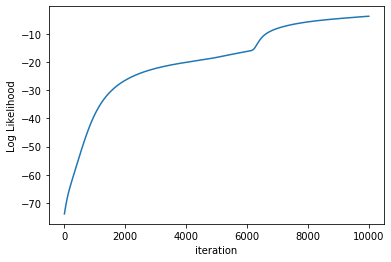

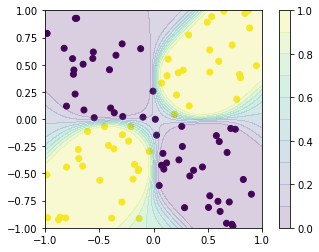

In [7]:
def create_toy_data():
    x = np.random.uniform(-1., 1., size=(100, 2))
    labels = np.prod(x, axis=1) > 0
    return x, labels.reshape(-1, 1)


x_train, y_train = create_toy_data()
model = ClassificationNetwork(2, 4, 1)
optimizer = nn.optimizer.Adam(model.parameter, 1e-3)
history = []
for i in range(10000):
    model.clear()
    logit = model(x_train)
    log_likelihood = -nn.loss.sigmoid_cross_entropy(logit, y_train).sum()
    optimizer.maximize(log_likelihood)
    history.append(log_likelihood.value)
    
plt.plot(history)
plt.xlabel("iteration")
plt.ylabel("Log Likelihood")
plt.show()
    
x0, x1 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
x = np.array([x0, x1]).reshape(2, -1).T
y = nn.sigmoid(model(x)).value.reshape(100, 100)

levels = np.linspace(0, 1, 11)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.ravel())
plt.contourf(x0, x1, y, levels, alpha=0.2)
plt.colorbar()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal')
plt.show()

## 5.5 Regularization in Neural Networks

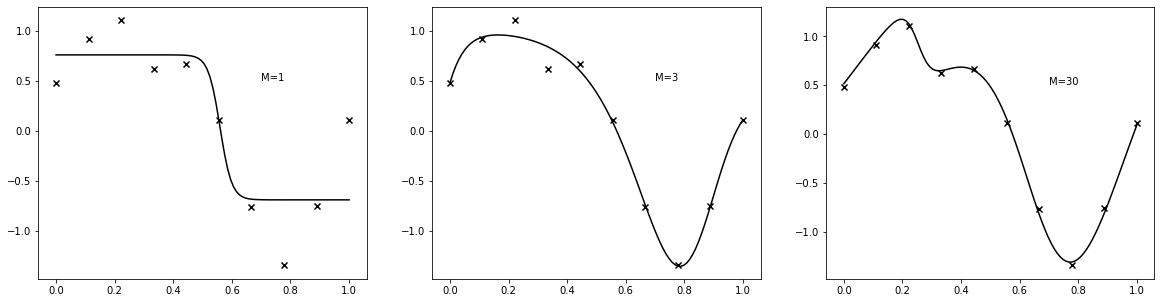

In [8]:
def create_toy_data(n=10):
    x = np.linspace(0, 1, n)[:, None]
    return x, np.sin(2 * np.pi * x) + np.random.normal(scale=0.25, size=(10, 1))


x_train, y_train = create_toy_data()
x = np.linspace(0, 1, 100)[:, None]

plt.figure(figsize=(20, 5))
for i, m in enumerate([1, 3, 30]):
    plt.subplot(1, 3, i + 1)
    model = RegressionNetwork(1, m, 1)
    optimizer = nn.optimizer.Adam(model.parameter, 0.1)
    for j in range(10000):
        model.clear()
        y = model(x_train)
        optimizer.minimize(nn.square(y - y_train).sum())
        if j % 1000 == 0:
            optimizer.learning_rate *= 0.9
    y = model(x)
    plt.scatter(x_train.ravel(), y_train.ravel(), marker="x", color="k")
    plt.plot(x.ravel(), y.value.ravel(), color="k")
    plt.annotate("M={}".format(m), (0.7, 0.5))
plt.show()

In [29]:
class RegularizedRegressionNetwork(nn.Network):
    
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        with self.set_parameter():
            self.w1 = nn.random.truncnormal(-2, 2, 1, (n_input, n_hidden))
            self.b1 = nn.zeros(n_hidden)
            self.w2 = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_output))
            self.b2 = nn.zeros(n_output)
        self.prior = nn.Gaussian(0, 1)

    def __call__(self, x):
        h = nn.tanh(x @ self.w1 + self.b1)
        return h @ self.w2 + self.b2
    
    def log_prior(self):
        logp = 0
        for param in self.parameter.values():
            logp += self.prior.log_pdf(param)
        return logp

$
\frac{\beta}{2} \sum_{n=1}^{N}\left\{y\left(x_{n}, \mathbf{w}\right)-t_{n}\right\}^{2}+\frac{\alpha}{2} \mathbf{w}^{\mathrm{T}} \mathbf{w}
$


In [34]:
%%pixie_debugger

model = RegularizedRegressionNetwork(1, 30, 1)
optimizer = nn.optimizer.Adam(model.parameter, 0.1)
history=[]
for i in range(10000):
    model.clear()
    pred = model(x_train)  
    log_posterior = -nn.square(pred - y_train).sum() + model.log_prior()
    optimizer.maximize(log_posterior)
    history.append(log_posterior)
    if i % 1000 == 0:
        optimizer.learning_rate *= 0.9
y = model(x).value

plt.figure()
plt.scatter(x_train, y_train, marker="x", color="k")
plt.plot(x, y, color="k")
plt.annotate("M=30", (0.7, 0.5))

plt.figure()
plt.xlabel("iters")
plt.ylabel("log_posterior")
plt.plot(np.linspace(0, len(history), len(history)), history)
plt.show()

In [ ]:
def load_mnist():
    mnist = fetch_mldata("MNIST original")
    x = mnist.data
    label = mnist.target

    x = x / np.max(x, axis=1, keepdims=True)
    x = x.reshape(-1, 28, 28, 1)

    x_train, x_test, label_train, label_test = train_test_split(x, label, test_size=0.1)
    y_train = LabelBinarizer().fit_transform(label_train)
    return x_train, x_test, y_train, label_test
x_train, x_test, y_train, label_test = load_mnist()

In [ ]:
class ConvolutionalNeuralNetwork(nn.Network):
    
    def __init__(self):
        super().__init__()
        with self.set_parameter():
            self.conv1 = nn.image.Convolve2d(
                nn.random.truncnormal(-2, 2, 1, (5, 5, 1, 20)),
                stride=(1, 1), pad=(0, 0))
            self.b1 = nn.array([0.1] * 20)
            self.conv2 = nn.image.Convolve2d(
                nn.random.truncnormal(-2, 2, 1, (5, 5, 20, 20)),
                stride=(1, 1), pad=(0, 0))
            self.b2 = nn.array([0.1] * 20)
            self.w3 = nn.random.truncnormal(-2, 2, 1, (4 * 4 * 20, 100))
            self.b3 = nn.array([0.1] * 100)
            self.w4 = nn.random.truncnormal(-2, 2, 1, (100, 10))
            self.b4 = nn.array([0.1] * 10)
        
    def __call__(self, x):
        h = nn.relu(self.conv1(x) + self.b1)
        h = nn.max_pooling2d(h, (2, 2), (2, 2))        
        h = nn.relu(self.conv2(h) + self.b2)
        h = nn.max_pooling2d(h, (2, 2), (2, 2))
        h = h.reshape(-1, 4 * 4 * 20)
        h = nn.relu(h @ self.w3 + self.b3)
        return h @ self.w4 + self.b4

model = ConvolutionalNeuralNetwork()
optimizer = nn.optimizer.Adam(model.parameter, 1e-3)

while True:
    indices = np.random.permutation(len(x_train))
    for index in range(0, len(x_train), 50):
        model.clear()
        x_batch = x_train[indices[index: index + 50]]
        y_batch = y_train[indices[index: index + 50]]
        logit = model(x_batch)
        log_likelihood = -nn.loss.softmax_cross_entropy(logit, y_batch).mean(0).sum()
        if optimizer.iter_count % 100 == 0:
            accuracy = accuracy_score(
                np.argmax(y_batch, axis=-1), np.argmax(logit.value, axis=-1)
            )
            print("step {:04d}".format(optimizer.iter_count), end=", ")
            print("accuracy {:.2f}".format(accuracy), end=", ")
            print("Log Likelihood {:g}".format(log_likelihood.value[0]))
        optimizer.maximize(log_likelihood)
        if optimizer.iter_count == 1000:
            break
    else:
        continue
    break

In [ ]:
print("accuracy (test):", accuracy_score(np.argmax(model(x_test).value, axis=-1), label_test))

## 5.6 Mixture Density Networks

In [ ]:
def create_toy_data(func, n=300):
    t = np.random.uniform(size=(n, 1))
    x = func(t) + np.random.uniform(-0.05, 0.05, size=(n, 1))
    return x, t

def func(x):
        return x + 0.3 * np.sin(2 * np.pi * x)

def sample(x, t, n=None):
    assert len(x) == len(t)
    N = len(x)
    if n is None:
        n = N
    indices = np.random.choice(N, n, replace=False)
    return x[indices], t[indices]

x_train, y_train = create_toy_data(func)

In [ ]:
class MixtureDensityNetwork(nn.Network):
    
    def __init__(self, n_input, n_hidden, n_components):
        self.n_components = n_components
        super().__init__()
        with self.set_parameter():
            self.w1 = nn.random.truncnormal(-2, 2, 1, (n_input, n_hidden))
            self.b1 = nn.zeros(n_hidden)
            self.w2c = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_components))
            self.b2c = nn.zeros(n_components)
            self.w2m = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_components))
            self.b2m = nn.zeros(n_components)
            self.w2s = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_components))
            self.b2s = nn.zeros(n_components)

    def __call__(self, x):
        h = nn.tanh(x @ self.w1 + self.b1)
        coef = nn.softmax(h @ self.w2c + self.b2c)
        mean = h @ self.w2m + self.b2m
        std = nn.exp(h @ self.w2s + self.b2s)
        return coef, mean, std
    
def gaussian_mixture_pdf(x, coef, mu, std):
    gauss = (
        nn.exp(-0.5 * nn.square((x - mu) / std))
        / std / np.sqrt(2 * np.pi)
    )
    return (coef * gauss).sum(axis=-1)

In [ ]:
model = MixtureDensityNetwork(1, 5, 3)
optimizer = nn.optimizer.Adam(model.parameter, 1e-4)

for i in range(30000):
    model.clear()
    coef, mean, std = model(x_train)
    log_likelihood = nn.log(gaussian_mixture_pdf(y_train, coef, mean, std)).sum()
    optimizer.maximize(log_likelihood)

In [ ]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
y = np.linspace(y_train.min(), y_train.max(), 100)[:, None, None]
coef, mean, std = model(x)

plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.plot(x[:, 0], coef.value[:, 0], color="blue")
plt.plot(x[:, 0], coef.value[:, 1], color="red")
plt.plot(x[:, 0], coef.value[:, 2], color="green")
plt.title("weights")

plt.subplot(2, 2, 2)
plt.plot(x[:, 0], mean.value[:, 0], color="blue")
plt.plot(x[:, 0], mean.value[:, 1], color="red")
plt.plot(x[:, 0], mean.value[:, 2], color="green")
plt.title("means")

plt.subplot(2, 2, 3)
proba = gaussian_mixture_pdf(y, coef, mean, std).value
levels_log = np.linspace(0, np.log(proba.max()), 21)
levels = np.exp(levels_log)
levels[0] = 0
xx, yy = np.meshgrid(x.ravel(), y.ravel())
plt.contour(xx, yy, proba.reshape(100, 100), levels)
plt.xlim(x_train.min(), x_train.max())
plt.ylim(y_train.min(), y_train.max())

plt.subplot(2, 2, 4)
argmax = np.argmax(coef.value, axis=1)
for i in range(3):
    indices = np.where(argmax == i)[0]
    plt.plot(x[indices, 0], mean.value[(indices, np.zeros_like(indices) + i)], color="r", linewidth=2)
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b")
plt.show()

## 5.7 Bayesian Neural Networks

In [ ]:
x_train, y_train = make_moons(n_samples=500, noise=0.2)
y_train = y_train[:, None]

In [ ]:
class Gaussian(nn.Network):

    def __init__(self, shape):
        super().__init__()
        with self.set_parameter():
            self.m = nn.zeros(shape)
            self.s = nn.zeros(shape)

    def __call__(self):
        self.q = nn.Gaussian(self.m, nn.softplus(self.s) + 1e-8)
        return self.q.draw()


class BayesianNetwork(nn.Network):
    
    def __init__(self, n_input, n_hidden, n_output=1):
        super().__init__()
        with self.set_parameter():
            self.qw1 = Gaussian((n_input, n_hidden))
            self.qb1 = Gaussian(n_hidden)
            self.qw2 = Gaussian((n_hidden, n_hidden))
            self.qb2 = Gaussian(n_hidden)
            self.qw3 = Gaussian((n_hidden, n_output))
            self.qb3 = Gaussian(n_output)
        self.posterior = [self.qw1, self.qb1, self.qw2, self.qb2, self.qw3, self.qb3]
        self.prior = nn.Gaussian(0, 1)

    def __call__(self, x):
        h = nn.tanh(x @ self.qw1() + self.qb1())
        h = nn.tanh(h @ self.qw2() + self.qb2())
        return nn.Bernoulli(logit=h @ self.qw3() + self.qb3())
    
    def kl(self):
        kl = 0
        for pos in self.posterior:
            kl += nn.loss.kl_divergence(pos.q, self.prior).mean()
        return kl

In [ ]:
model = BayesianNetwork(2, 5, 1)
optimizer = nn.optimizer.Adam(model.parameter, 0.1)
for i in range(1, 2001, 1):
    model.clear()
    py = model(x_train)
    elbo = py.log_pdf(y_train).mean(0).sum() - model.kl() / len(x_train)
    optimizer.maximize(elbo)
    if i % 100 == 0:
        optimizer.learning_rate *= 0.9

In [ ]:
x_grid = np.mgrid[-2:3:100j, -2:3:100j]
x1, x2 = x_grid[0], x_grid[1]
x_grid = x_grid.reshape(2, -1).T

y = np.mean([model(x_grid).mean.value.reshape(100, 100) for _ in range(10)], axis=0)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.ravel(), s=5)
plt.contourf(x1, x2, y, np.linspace(0, 1, 11), alpha=0.2)
plt.colorbar()
plt.xlim(-2, 3)
plt.ylim(-2, 3)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()